<a href="https://colab.research.google.com/github/AbhilashIngale/EVA-Projects/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

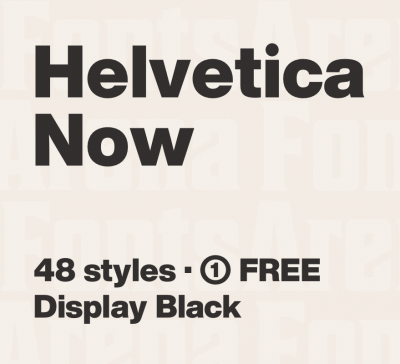

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

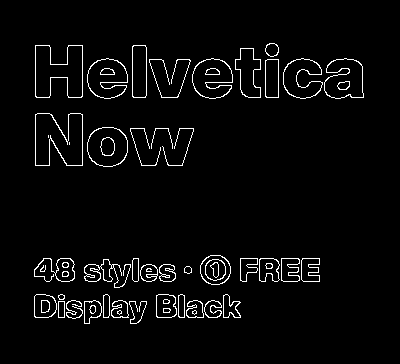

In [6]:
cv2_imshow(edges)

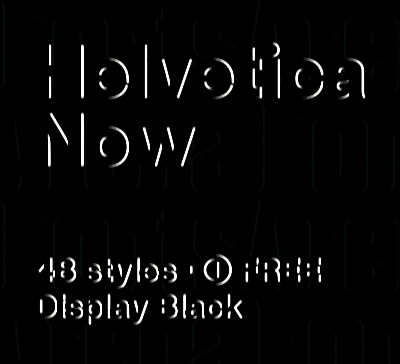

In [17]:

#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

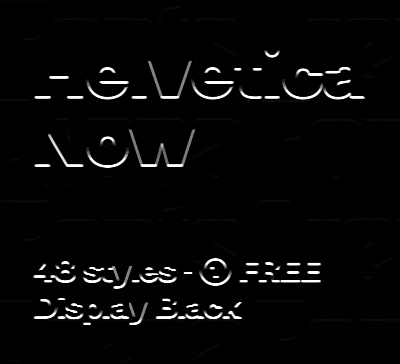

In [8]:
# Horizontal edge detector
# Since the above kernel is for vertical edge detection, the tranpose of that kernel would detect horizontal edges.
Hor= kernel.transpose()
dst_Hor = cv2.filter2D(image,-1,Hor)

cv2_imshow(dst_Hor)

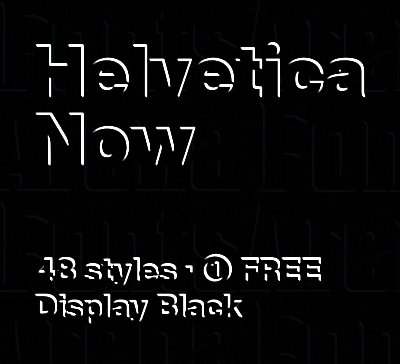

In [21]:
# 45 degree edge detector
# Sobel 45 degrees edge detector : https://homepages.inf.ed.ac.uk/rbf/HIPR2/prewitt.htm
edge45= np.float32([[0,1,2],[-1,0,1],[-2,-1,0]])
dst_45 = cv2.filter2D(image,-1,edge45)

cv2_imshow(dst_45)

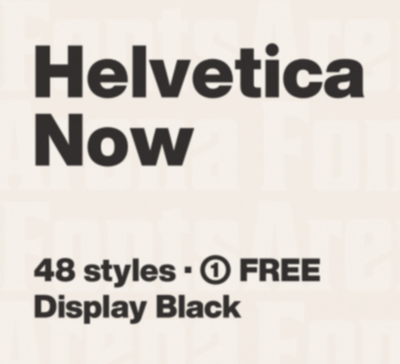

In [10]:
# Kernel to blur the image
blur= np.float32([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])
dst_blur = cv2.filter2D(image,-1,blur)
cv2_imshow(dst_blur)

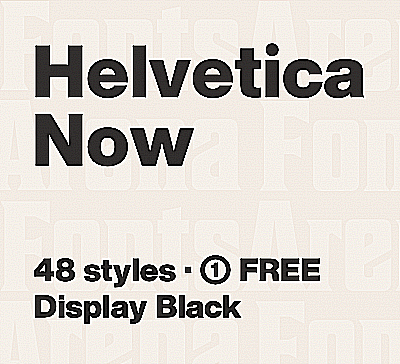

In [11]:
# Kernel to sharpen the image
sharp= np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
dst_sharp = cv2.filter2D(image,-1,sharp)
cv2_imshow(dst_sharp)

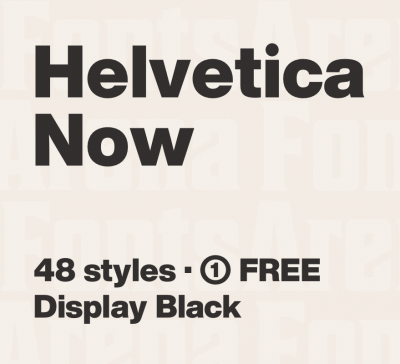

In [19]:
# Identity Kernel : Does not change the image
# Achieved it by trial and error, don't really know how it works
identity= np.float32([[0,0,0],[0,1,0],[0,0,0]])
dst_id = cv2.filter2D(image,-1,identity)
cv2_imshow(dst_id)